In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

## 原始數據

In [2]:
n = 36
x = [*range(n)]
y = [33, 56 , 87, 104, 160 ,183, 133, 216, 281, 382, 384, 442, 431, 439, 551, 744, 874, 1209, 1199, 1210, 1390, 1626, 2386, 2969, 3766, 4126, 5172, 5221, 6339, 8923, 11517, 12313, 15033, 17085, 17858, 23139]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

35天前 [33]
34天前 [56]
33天前 [87]
32天前 [104]
31天前 [160]
30天前 [183]
29天前 [133]
28天前 [216]
27天前 [281]
26天前 [382]
25天前 [384]
24天前 [442]
23天前 [431]
22天前 [439]
21天前 [551]
20天前 [744]
19天前 [874]
18天前 [1209]
17天前 [1199]
16天前 [1210]
15天前 [1390]
14天前 [1626]
13天前 [2386]
12天前 [2969]
11天前 [3766]
10天前 [4126]
9天前 [5172]
8天前 [5221]
7天前 [6339]
6天前 [8923]
5天前 [11517]
4天前 [12313]
3天前 [15033]
2天前 [17085]
1天前 [17858]
0天前 [23139]


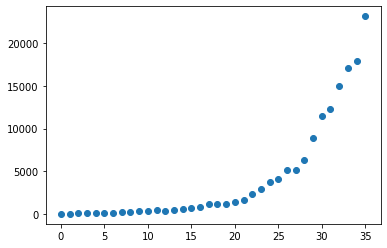

In [3]:
print(*[f'{n-i-1}天前 {y[i]}' for i in range(n)], sep='\n')
plt.scatter(x, y)

## 使用多項式回歸

### degree = 5

array([[ 25759.27263327],
       [ 29404.14570876],
       [ 33409.5571518 ],
       [ 37793.9368966 ],
       [ 42575.50061898],
       [ 47772.19113483],
       [ 53401.61979857],
       [ 59481.00790163],
       [ 66027.12807088],
       [ 73056.24566713],
       [ 80584.06018356],
       [ 88625.64664423],
       [ 97195.3970025 ],
       [106306.96153952],
       [115973.19026267],
       [126206.07430407],
       [137016.68731898],
       [148415.12688432],
       [160410.4558971 ],
       [173010.64397292]])

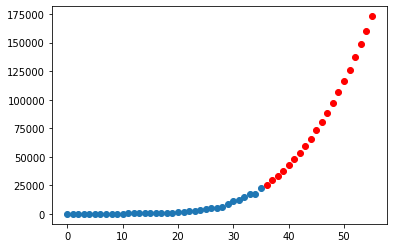

In [12]:
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)

nx = np.array([*range(n, n+20)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model2.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)

## degree = 4

array([[ 25933.54197437],
       [ 29719.71451513],
       [ 33918.48312114],
       [ 38558.9562287 ],
       [ 43671.22934721],
       [ 49286.38505916],
       [ 55436.49302011],
       [ 62154.60995873],
       [ 69474.77967678],
       [ 77432.03304909],
       [ 86062.3880236 ],
       [ 95402.84962133],
       [105491.40993639],
       [116367.04813598],
       [128069.73046038],
       [140640.41022297],
       [154121.02781022],
       [168554.51068169],
       [183984.77337002],
       [200456.71748094]])

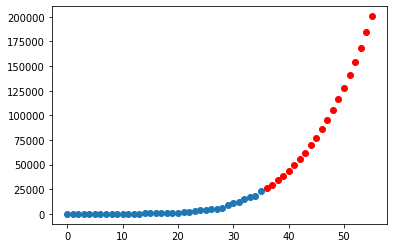

In [5]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
model3 = LinearRegression()
model3.fit(x_poly, y)

nx = np.array([*range(n, n+20)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model3.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)